# NYC's COVID-19 deaths

**Data source:** New York City Health Department's [COVID-19 Daily Data Summary - Deaths](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary-deaths.pdf)

## 0. Import dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read data

In [5]:
#update_str = 'as of March 28, 2020, 4:00 pm (NYC Health)'
update_str = 'as of March 28, 2020, 4:00 pm'
source_str = 'Sources: Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'

file = '../data/nyc-health-daily-updates/deaths/nyc-covid-19-deaths_2020-03-28_16-00.csv'
df = pd.read_csv(file)
df.set_index('index', inplace=True)
df

,uc_yes,uc_no,uc_pending,total
index,,,,
age_0_to_17,0,0,0,0
age_18_to_44,23,1,8,32
age_45_to_64,125,8,28,161
age_65_to_74,125,2,31,158
age_75_and_over,254,6,61,321
sex_female,213,6,42,261
sex_male,314,11,86,411
borough_bronx,142,1,9,152
borough_brooklyn,112,5,50,167


## 2. Total deaths by age group

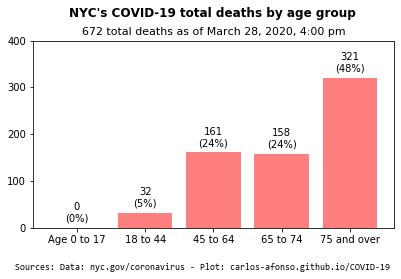

In [6]:
fig = plt.figure()

rows   = ['age_0_to_17', 'age_18_to_44', 'age_45_to_64', 'age_65_to_74', 'age_75_and_over']
labels = ['Age 0 to 17',     '18 to 44',     '45 to 64',     '65 to 74',     '75 and over']
values = df.loc[rows]['total'].values
total = sum(values)

plt.bar(labels, values, alpha=0.5, color='red')

plt.ylim(0, 400)
plt.yticks([0, 100, 200, 300, 400])

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center') #color='dimgray'

plt.suptitle('NYC\'s COVID-19 total deaths by age group', x=0.5, fontweight='bold')
plt.title(str(total) + ' total deaths ' + update_str, fontsize=11)

plt.text(-0.9, -90, source_str, fontfamily='Consolas', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-deaths-by-age-group'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)